# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,241
Treatment,157


col_0,Frequency
status,
Control,0.605528
Treatment,0.394472


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,23.631847,5.426752,187.694268,2937.101911,15.775796
std,7.568635,1.691623,101.732282,831.542174,2.698703
min,11.000000,4.000000,68.000000,1649.000000,8.000000
25%,17.500000,4.000000,98.000000,2164.000000,14.000000
50%,23.000000,4.000000,140.000000,2830.000000,15.500000
75%,29.500000,8.000000,260.000000,3613.000000,17.000000
max,43.400000,8.000000,455.000000,4906.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,241.000000,241.000000,241.000000,241.00000,241.000000
mean,23.438174,5.473029,197.161826,2992.13278,15.432780
std,7.987665,1.710354,105.931005,857.68326,2.792692
min,9.000000,3.000000,70.000000,1613.00000,8.500000
25%,16.900000,4.000000,105.000000,2265.00000,13.500000
50%,22.000000,4.000000,151.000000,2795.00000,15.200000
75%,29.000000,8.000000,302.000000,3570.00000,17.300000
max,46.600000,8.000000,455.000000,5140.00000,24.600000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [13]:
def fn_speed_in_km(x): 
    if x > 10: 
        K= x*10 
        return(K)
    else: 
        K = x*0 

carfeatures["km"]=carfeatures["mpg"].apply(fn_speed_in_km)
display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,km
0,18.0,8,307,130,3504,12.0,C-1689780,Control,180.0
1,15.0,8,350,165,3693,11.5,B-1689791,Control,150.0
2,18.0,8,318,150,3436,11.0,P-1689802,Control,180.0
3,16.0,8,304,150,3433,12.0,A-1689813,Control,160.0
4,17.0,8,302,140,3449,10.5,F-1689824,Control,170.0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,270.0
394,44.0,4,97,52,2130,24.6,V-1694114,Control,440.0
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment,320.0
396,28.0,4,120,79,2625,18.6,F-1694136,Control,280.0


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [25]:
median=carfeatures["km"].median()

subset_carfeatures=carfeatures.query("km>@median")

print(median)
display(subset_carfeatures)

230.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,km
14,24.0,4,113,95,2372,15.0,T-1689934,Control,240.0
18,27.0,4,97,88,2130,14.5,D-1689978,Control,270.0
19,26.0,4,97,46,1835,20.5,V-1689989,Control,260.0
20,25.0,4,110,87,2672,17.5,P-1690000,Control,250.0
21,24.0,4,107,90,2430,14.5,A-1690011,Control,240.0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,270.0
394,44.0,4,97,52,2130,24.6,V-1694114,Control,440.0
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment,320.0
396,28.0,4,120,79,2625,18.6,F-1694136,Control,280.0


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [27]:
subset_carfeatures.sort_values(by="km",ascending=False)
display(carfeatures.iloc[ 0:5, : ])



,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,km
0,18.0,8,307,130,3504,12.0,C-1689780,Control,180.0
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,150.0
2,18.0,8,318,150,3436,11.0,P-1689802,Control,180.0
3,16.0,8,304,150,3433,12.0,A-1689813,Control,160.0
4,17.0,8,302,140,3449,10.5,F-1689824,Control,170.0


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [14]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)
frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')



<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [ ]:
def f(y,x,b0,b1): 
    

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

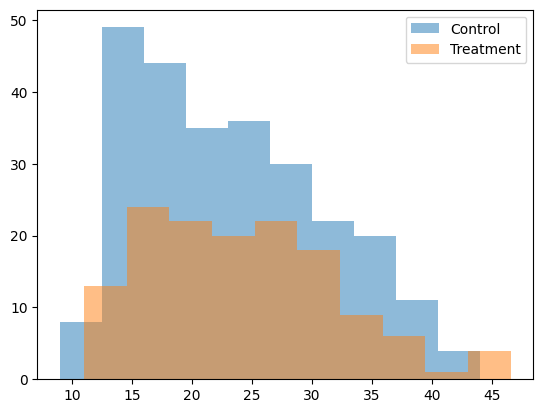

In [44]:
list_unique_treatment = pd.unique(carfeatures["status"])

for category_value in list_unique_treatment:
    temporarydataframe = carfeatures.query("status == @category_value")
    plt.hist(temporarydataframe["mpg"],alpha = 0.5)

plt.legend(labels = list_unique_treatment)

